In [1]:
from pyuvdata import UVBeam
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lwa_feko = '/data05/nmahesh/OVRO-LWA_Beam-models/FEKO_raw/OVRO_LWA_x_10to100_MRO-soil_updatedheight.ffe'

# Power beams

In [3]:
pbeam_feko = UVBeam.from_file(
    lwa_feko, beam_type='power', frequency=None,
    feed_pol='x', telescope_name='LWA',
    feed_name='LWA', feed_version='1',
    model_name='FEKO_MROsoil_updatedheight', model_version='1.0',
    )

In [4]:
np.shape(pbeam_feko.data_array) #(Nfields,Npol,Nfreq,Ntheta,Nphi) for power beam Nfields = 1

(1, 1, 91, 181, 361)

(10.0, 100.0)

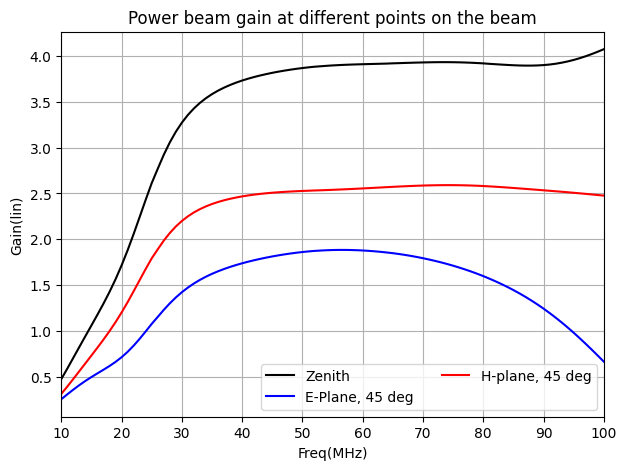

In [55]:
plt.figure(figsize=(7,5))
plt.plot(pbeam_feko.freq_array/1e6,pbeam_feko.data_array[0,0,:,0,0],'k',label=r'Zenith')
plt.plot(pbeam_feko.freq_array/1e6,pbeam_feko.data_array[0,0,:,45,0],'b',label=r'E-Plane, 45 deg')
plt.plot(pbeam_feko.freq_array/1e6,pbeam_feko.data_array[0,0,:,45,90],'r',label=r'H-plane, 45 deg')

plt.title('Power beam gain at different points on the beam')
plt.legend(ncols=2)
plt.ylabel('Gain(lin)')
plt.xlabel('Freq(MHz)')
plt.grid()
plt.xlim([10,100])

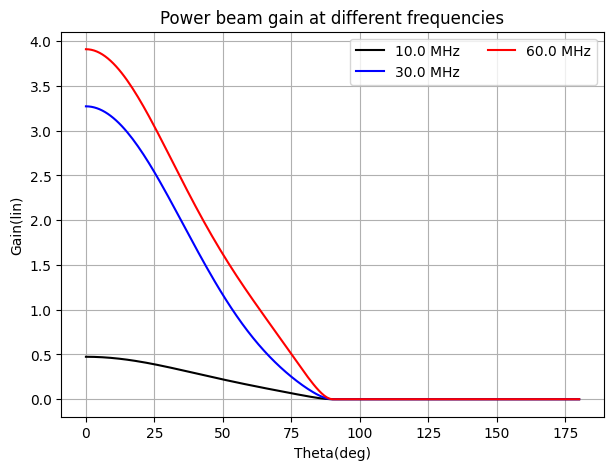

In [56]:
plt.figure(figsize=(7,5))
plt.plot(pbeam_feko.axis2_array*180/np.pi,pbeam_feko.data_array[0,0,0,:,0],'k',label=str(pbeam_feko.freq_array[0]/1e6)+' MHz')
plt.plot(pbeam_feko.axis2_array*180/np.pi,pbeam_feko.data_array[0,0,20,:,0],'b',label=str(pbeam_feko.freq_array[20]/1e6)+' MHz')
plt.plot(pbeam_feko.axis2_array*180/np.pi,pbeam_feko.data_array[0,0,50,:,0],'r',label=str(pbeam_feko.freq_array[50]/1e6)+' MHz')

plt.title('Power beam gain at different frequencies')
plt.legend(ncols=2)
plt.ylabel('Gain(lin)')
plt.xlabel('Theta(deg)')
plt.grid()


In [25]:
P,T = np.meshgrid(pbeam_feko.axis1_array,pbeam_feko.axis2_array)

IndexError: index 1 is out of bounds for axis 1 with size 1

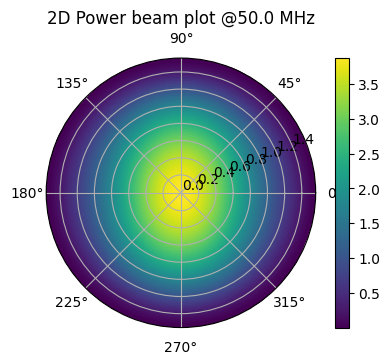

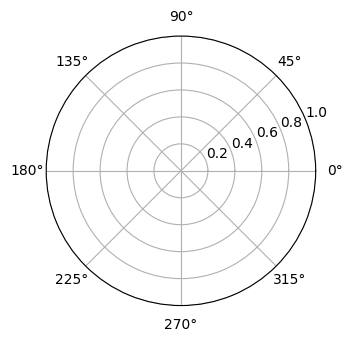

In [57]:
fig5, axs = plt.subplots(figsize=(5,3.5),subplot_kw=dict(polar=True))
plt.pcolormesh(P[:90,:],T[:90,:], pbeam_feko.data_array[0,0,40,:90,:])
plt.colorbar()
plt.title('2D Power beam plot @'+str(pbeam_feko.freq_array[40]/1e6)+' MHz')


fig5, axs = plt.subplots(figsize=(5,3.5),subplot_kw=dict(polar=True))
plt.pcolormesh(P[:90,:],T[:90,:], pbeam_feko.data_array[0,1,40,:90,:])
plt.colorbar()
plt.title('2D Power beam plot @'+str(pbeam_feko.freq_array[40]/1e6)+' MHz')

# E-field beams

In [41]:
ebeam_feko = UVBeam.from_file(
    lwa_feko, beam_type='efield', frequency=None,
    feed_pol='x', telescope_name='LWA',
    feed_name='LWA', feed_version='1',
    model_name='FEKO_MROsoil_updatedheight', model_version='1.0',
    )

In [42]:
np.shape(ebeam_feko.data_array) #(Nvec, Npol, Nfreq, Ntheta, Nphi), #Nvec = 0|1 ==> Phi beam | theta beam, Npol = 0 ==> x-dipole

(2, 2, 91, 181, 361)

Text(0.5, 0, 'Freq(MHz)')

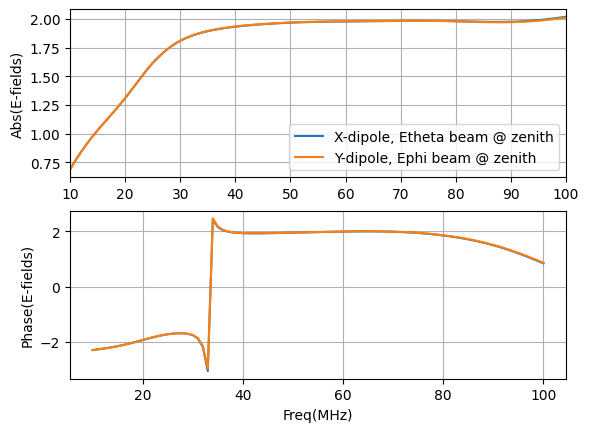

In [52]:
plt.subplot(2,1,1)
plt.plot(ebeam_feko.freq_array/1e6, np.abs(ebeam_feko.data_array[1,0,:,0,0]),label='X-dipole, Etheta beam @ zenith')
plt.plot(ebeam_feko.freq_array/1e6, np.abs(ebeam_feko.data_array[0,1,:,0,0]), label='Y-dipole, Ephi beam @ zenith')

plt.legend()
plt.grid()
plt.xlim([10,100])
plt.ylabel('Abs(E-fields)')

plt.subplot(2,1,2)
plt.plot(ebeam_feko.freq_array/1e6, np.angle(ebeam_feko.data_array[1,0,:,0,0]),label='X-dipole, Etheta beam @ zenith')
plt.plot(ebeam_feko.freq_array/1e6, np.angle(ebeam_feko.data_array[0,1,:,0,0]), label='Y-dipole, Ephi beam @ zenith')

plt.ylabel('Phase(E-fields)')
plt.grid()
plt.xlabel('Freq(MHz)')

In [44]:
P,T = np.meshgrid(ebeam_feko.axis1_array,ebeam_feko.axis2_array)

Text(0.5, 1.0, 'X-dipole Ephi beam plot @50.0 MHz')

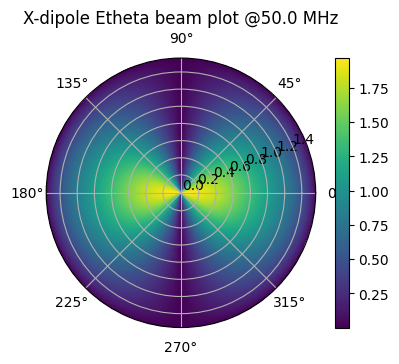

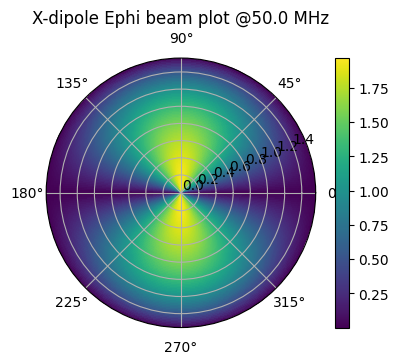

In [49]:
fig5, axs = plt.subplots(figsize=(5,3.5),subplot_kw=dict(polar=True))
plt.pcolormesh(P[:90,:],T[:90,:], np.abs(ebeam_feko.data_array[1,0,40,:90,:]))
plt.colorbar()
plt.title('X-dipole Etheta beam plot @'+str(ebeam_feko.freq_array[40]/1e6)+' MHz')

fig5, axs = plt.subplots(figsize=(5,3.5),subplot_kw=dict(polar=True))
plt.pcolormesh(P[:90,:],T[:90,:], np.abs(ebeam_feko.data_array[0,0,40,:90,:]))
plt.colorbar()
plt.title('X-dipole Ephi beam plot @'+str(ebeam_feko.freq_array[40]/1e6)+' MHz')

Text(0.5, 1.0, 'Y-dipole Ephi beam plot @80.0 MHz')

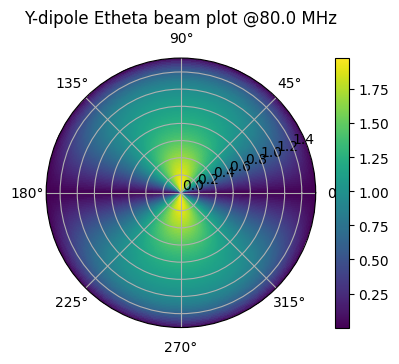

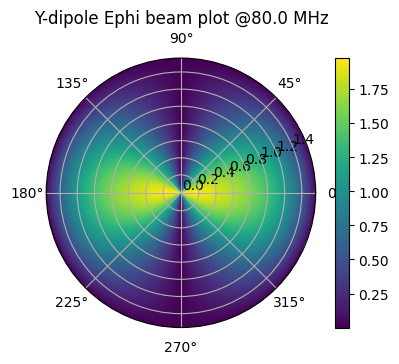

In [54]:
fig5, axs = plt.subplots(figsize=(5,3.5),subplot_kw=dict(polar=True))
plt.pcolormesh(P[:90,:],T[:90,:], np.abs(ebeam_feko.data_array[1,1,70,:90,:]))
plt.colorbar()
plt.title('Y-dipole Etheta beam plot @'+str(ebeam_feko.freq_array[70]/1e6)+' MHz')

fig5, axs = plt.subplots(figsize=(5,3.5),subplot_kw=dict(polar=True))
plt.pcolormesh(P[:90,:],T[:90,:], np.abs(ebeam_feko.data_array[0,1,70,:90,:]))
plt.colorbar()
plt.title('Y-dipole Ephi beam plot @'+str(ebeam_feko.freq_array[70]/1e6)+' MHz')